# Hola &#x1F600;

Soy **Hesus Garcia**, revisor de código de Triple Ten, y voy a examinar el proyecto que has desarrollado recientemente. Si encuentro algún error, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;


# Descripción proyecto

El siguiente trabajo analiza los datos de la tienda online Ice que vende videojuegos alrededor del mundo. El objetivo es identificar los juegos exitosos y aquellos que no tanto, para así poder tomar decisiones estratégicas para futuros proyectos y campañas. 

# Inicialización
En la primera parte de este trabajo se realizarán los siguientes procesos: 
1. Cargar librerías para realizar el análisis.
2. Importar dataset. 
3. Revisar datos para posterior limpieza y enrequecimiento en caso de ser necesario. 


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Me parece genial que hayas incluido una tabla de contenidos en tu documento, esto facilitará la navegación y comprensión de los temas que estás tratando. ¡Sigue así!</div>
</div>


## Descripción de los datos 

In [1]:
#importar librerías
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#cargar dataset
games_df = pd.read_csv('/datasets/games.csv')
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games_df[games_df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
games_df[games_df['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
games_df.duplicated().sum()

0

In [7]:
games_df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [8]:
games_df['Year_of_Release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64

In [9]:
games_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
games_df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
games_df.query('User_Score == "tbd"')['User_Score'].count()

2424

In [12]:
games_df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

## Preprocesamiento de datos

In [13]:
#eliminiar mayúsculas en los nombres de columnas 

new_names = []

for name in games_df.columns:
    name_lowered = name.lower()
    new_names.append(name_lowered)
    
games_df.columns = new_names

### Year of release

In [14]:
#comprobar si NaN puede corresponder a algún año del cual no se tenga información

unique_years = games_df['year_of_release'].unique()
sorted(unique_years)

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan]

In [15]:
#revisar porcentaje de NaN

games_df['year_of_release'].value_counts(dropna=False, normalize=True)

2008.0    0.085372
2009.0    0.085313
2010.0    0.075082
2007.0    0.071612
2011.0    0.067963
2006.0    0.060185
2005.0    0.056177
2002.0    0.049596
2003.0    0.046366
2004.0    0.045588
2012.0    0.039067
2015.0    0.036255
2014.0    0.034759
2013.0    0.032546
2016.0    0.030033
2001.0    0.028836
1998.0    0.022674
2000.0    0.020939
1999.0    0.020221
1997.0    0.017290
NaN       0.016093
1996.0    0.015734
1995.0    0.013102
1994.0    0.007239
1993.0    0.003709
1981.0    0.002752
1992.0    0.002573
1991.0    0.002453
1982.0    0.002154
1986.0    0.001256
1983.0    0.001017
1989.0    0.001017
1990.0    0.000957
1987.0    0.000957
1988.0    0.000897
1984.0    0.000838
1985.0    0.000838
1980.0    0.000538
Name: year_of_release, dtype: float64

In [16]:
#reemplazar NaN en columna year_of_release por 0 

games_df['year_of_release'].fillna(0, inplace=True)

In [17]:
#convertir tipo de dato en columna year_of_release

games_df['year_of_release'] = games_df['year_of_release'].astype('int')

### User score

In [18]:
#revisar porcentaje de valores
games_df['user_score'].value_counts(dropna= False, normalize=True)

NaN    0.400897
tbd    0.145019
7.8    0.019384
8      0.017350
8.2    0.016871
         ...   
0.6    0.000120
1.5    0.000120
2.3    0.000120
9.7    0.000060
0      0.000060
Name: user_score, Length: 97, dtype: float64

In [19]:
games_df[games_df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
#revisar si hay los user_score tbd son también entradas con información faltante en años

games_df[(games_df['user_score'] == 'tbd') & (games_df['year_of_release'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [21]:
#revisar si hay algún patrón entre tbd y los años faltantes

games_df[games_df['user_score'] == 'tbd'].sort_values(by='year_of_release', ascending=True) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11957,Yoostar on MTV,X360,0,Misc,0.07,0.00,0.0,0.01,49.0,tbd,T
10465,Disney's Chicken Little: Ace In Action,Wii,0,Shooter,0.09,0.00,0.0,0.01,72.0,tbd,E10+
14546,Combat Elite: WWII Paratroopers,XB,0,Shooter,0.02,0.01,0.0,0.00,56.0,tbd,T
9876,Major League Baseball 2K6,PSP,0,Sports,0.11,0.00,0.0,0.01,69.0,tbd,E
9855,The Daring Game for Girls,DS,0,Adventure,0.11,0.00,0.0,0.01,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
9813,Farming Simulator 17,XOne,2016,Simulation,0.04,0.07,0.0,0.01,65.0,tbd,E
9805,Destiny: The Collection,XOne,2016,Shooter,0.05,0.06,0.0,0.01,NaN,tbd,T
14982,Duke Nukem 3D: 20th Anniversary World Tour,XOne,2016,Shooter,0.02,0.00,0.0,0.00,70.0,tbd,M
14851,Rugby Challenge 3,PS3,2016,Sports,0.00,0.02,0.0,0.00,NaN,tbd,NaN


In [22]:
#cambiar valores tbd por NaN 
games_df['user_score'].replace('tbd', np.nan, inplace=True)

In [23]:
#modificar tipo de dato

games_df['user_score'] = games_df['user_score'].astype('float')

### Critic score


In [24]:
#revisar porcentaje de valores
games_df['critic_score'].value_counts(dropna= False, normalize=True)

NaN     0.513192
70.0    0.015316
71.0    0.015196
75.0    0.014657
78.0    0.014358
          ...   
29.0    0.000179
21.0    0.000060
22.0    0.000060
13.0    0.000060
17.0    0.000060
Name: critic_score, Length: 83, dtype: float64

In [25]:
#reisar si hay una relación entre la falta de datos y los años de lanzamiento
games_df[games_df['critic_score'].isna()].sort_values(by='year_of_release', ascending=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16079,Football Manager 2007,X360,0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
13647,The History Channel: Great Battles - Medieval,PS3,0,Strategy,0.00,0.03,0.00,0.01,NaN,NaN,NaN
5194,Cubix Robots for Everyone: Clash 'n' Bash,GBA,0,Action,0.26,0.10,0.00,0.01,NaN,NaN,NaN
2773,WarioWare: Twisted!,GBA,0,Puzzle,0.16,0.06,0.50,0.02,NaN,NaN,NaN
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16403,Dynasty Warriors: Eiketsuden,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
8566,Lego Star Wars: The Force Awakens,PS3,2016,Action,0.04,0.10,0.00,0.03,NaN,NaN,E10+
11414,Guilty Gear Xrd -Revelator-,PS4,2016,Fighting,0.03,0.00,0.05,0.01,NaN,NaN,NaN
11578,UEFA Euro 2016,PS3,2016,Sports,0.00,0.04,0.03,0.01,NaN,NaN,NaN


In [26]:
#revisar si hay algún año donde la falta de información es significativa y si hay al
games_df[games_df['critic_score'].isna()].groupby(by='year_of_release').count().sort_values(by='name', ascending=False)

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
year_of_release,,,,,,,,,,
2009,775,775,775,775,775,775,775,0,60,366
2010,755,755,755,755,755,755,755,0,36,302
2008,712,712,712,712,712,712,712,0,66,271
2011,636,636,636,636,636,636,636,0,35,215
2007,505,505,505,505,505,505,505,0,39,129
2006,386,386,386,386,386,386,386,0,24,59
2015,381,381,381,381,381,381,381,0,76,103
1998,351,351,351,351,351,351,351,0,5,5
2012,332,332,332,332,332,332,332,0,18,42


### Rating

In [27]:
#revisar porcentaje de valores
games_df['rating'].value_counts(dropna= False, normalize=True)

NaN     0.404786
E       0.238708
T       0.177146
M       0.093509
E10+    0.084954
EC      0.000479
RP      0.000179
K-A     0.000179
AO      0.000060
Name: rating, dtype: float64

In [28]:
#revisar si hay una relación entre valores tbd y NaN en rating
games_df[(games_df['user_score'] == 'tbd') & (games_df['rating'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [29]:
games_df[games_df['rating'].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8579,Destruction Derby 64,N64,1999,Racing,0.13,0.03,0.00,0.00,NaN,NaN,NaN
16483,Petz: Hamsterz Life 2,GBA,2007,Misc,0.01,0.00,0.00,0.00,NaN,NaN,NaN
10494,Dungeon Travelers 2: The Royal Library & The M...,PSV,2014,Role-Playing,0.03,0.02,0.05,0.01,NaN,NaN,NaN
8954,Tamagotchi Collection,DS,2011,Misc,0.00,0.00,0.15,0.00,NaN,NaN,NaN
12737,Senritsu no Stratus,PSP,2011,Role-Playing,0.00,0.00,0.06,0.00,NaN,NaN,NaN
2848,Disney Infinity 3.0,PS4,2015,Action,0.24,0.37,0.00,0.12,NaN,NaN,NaN
15727,Robopon 2: Cross Version,GBA,2001,Role-Playing,0.01,0.00,0.00,0.00,NaN,NaN,NaN
8323,World Driver Championship,N64,1999,Racing,0.14,0.03,0.00,0.00,NaN,NaN,NaN
4849,SD Gundam G Generation Seed,PS2,2004,Strategy,0.00,0.00,0.40,0.00,NaN,NaN,NaN
8430,Street Fighter Alpha 2,SNES,1996,Fighting,0.00,0.00,0.17,0.00,NaN,NaN,NaN


In [30]:
games_df[(games_df['rating'].isna()) & (games_df['critic_score'].isna()) & (games_df['user_score'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [31]:
games_df['rating'].fillna('Unknown', inplace=True)

### Columna total_sales


In [32]:
#crear nueva columna con total de ventas de cada juego

games_df.insert(8, 'total_sales', games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) )

### Conclusiones

En esta etapa se ajustaron los nombres de las columnas y modificaron los datos en caso de ser pertimente. Las columnas year_of_release, critic_score, user_score y rating presentaban un porcentaje muy significativo de NaN o datos sin completar en comparación al total de datos, por lo que se procedió de las siguiente manera: 
1. year_of_release: los datos ausentes se reemplazaron por 0, ya que este nuevo valor sí da a entender que son valores que no se encontraron y permite un mejor trabajo a futuro con los datos. 
2. critic_score: se dejaron los valores NaN porque reemplazarlos significaría alterar en gran manera la estadística general en ambas columnas. 
3. rating: se modificó con 'Unknown' ya que sigue siendo un tipo de dato de tipo objeto y nos deja en evidencia que falta esa información.
4. user_score: los valores NaN se mantuvieron y se agregaron nuevos datos ausentes al reemplazar 'tbd' por NaN, de esta forma, se puede trabajar con el tipo de dato correcto en esta columna y no alterar la estadística de la misma. 

Las columnas name y genre poseían dos NaN, sin embargo, estas estaban en las mismas filas. Se decide dejar estar dos entradas porque contienen información completa acerca de las ventas. Sebido a la naturaleza de los datos, era imposible reemplazar estos valores. 

Antes de decir qué hacer con los datos, se trató de encontrar relaciones entre los valores NaN de cada columna, sin embargo, los resultador fueron muy variados. Debido a la cantidad de datos faltantes, lo más probable es que fue información que se perdió en el camino o no tenían la cantidad de votos suficientes como para poder determinar puntajes y ratings.


<div class="alert alert-block alert-success">
<b>Comentarios del revisor</b>

Excelente trabajo en la exploración y preprocesamiento de datos. Has realizado un análisis detallado de cada columna, identificando valores faltantes, duplicados y anomalías. Tu enfoque para manejar los valores NaN y 'tbd' es apropiado y bien justificado.
</div>

## Análisis de datos


### Análisis por años

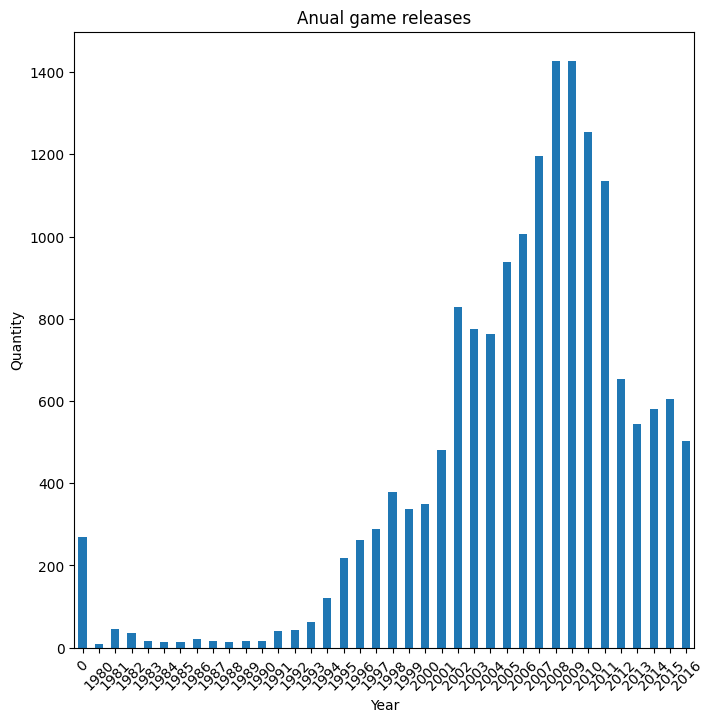

In [33]:
#graficar cantidad de juegos lanzamos por año 
releases_per_year = games_df.groupby('year_of_release').size().sort_index()
                                     
releases_per_year.plot(kind='bar',
                      title='Anual game releases',
                      xlabel='Year',
                      ylabel='Quantity',
                      rot=45, 
                      figsize=[8, 8])
                       
                     

plt.show()

In [34]:
#identificar ventas por plataforma y año

platforms_anual_sales = games_df.pivot_table(index='year_of_release', 
                                             columns='platform',
                                             values='total_sales', 
                                             aggfunc=sum)

In [35]:
#graficar pivot table

#platforms_anual_sales.loc[2000:2016].plot(kind='bar',
                                         #figsize=[10,8],
                                         #linewidth=5,
                                         #title='Platforms anual sales',
                                         #ylabel='Million dollars',
                                         #xlabel='Platform', 
                                         #rot=45)
                                        
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.show()

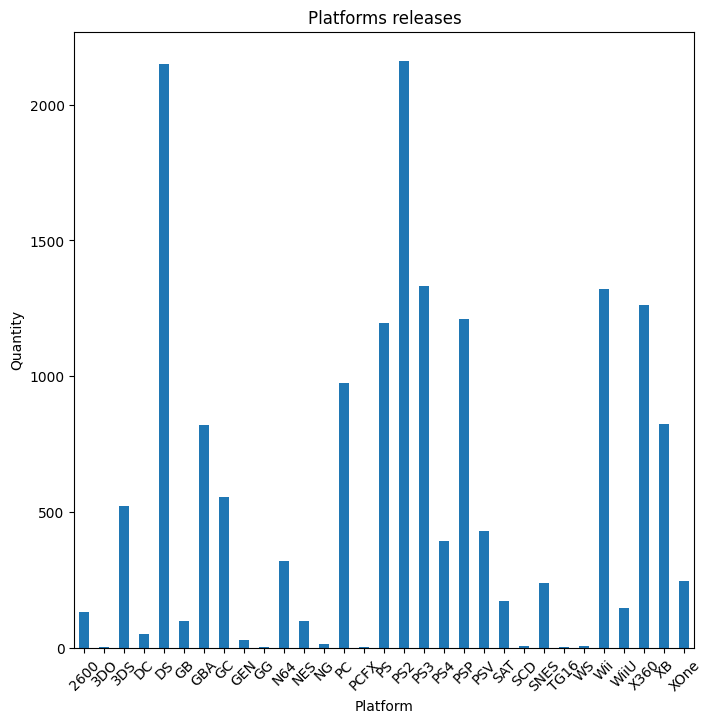

In [36]:
#graficar cantidad de juegos lanzados por plataforma 
releases_per_platform = games_df.groupby('platform').size()
                                     
releases_per_platform.plot(kind='bar',
                      title='Platforms releases',
                      xlabel='Platform',
                      ylabel='Quantity',
                      rot=45, 
                      figsize=[8, 8])
                       
                     

plt.show()

In [37]:
#identificar 10 plataformas con mejores ventas

top_10_platforms = (games_df.groupby('platform')['total_sales']
                    .sum()
                    .sort_values(ascending=False)
                    .head(10)
                    .index.tolist()
                   )
top_10_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

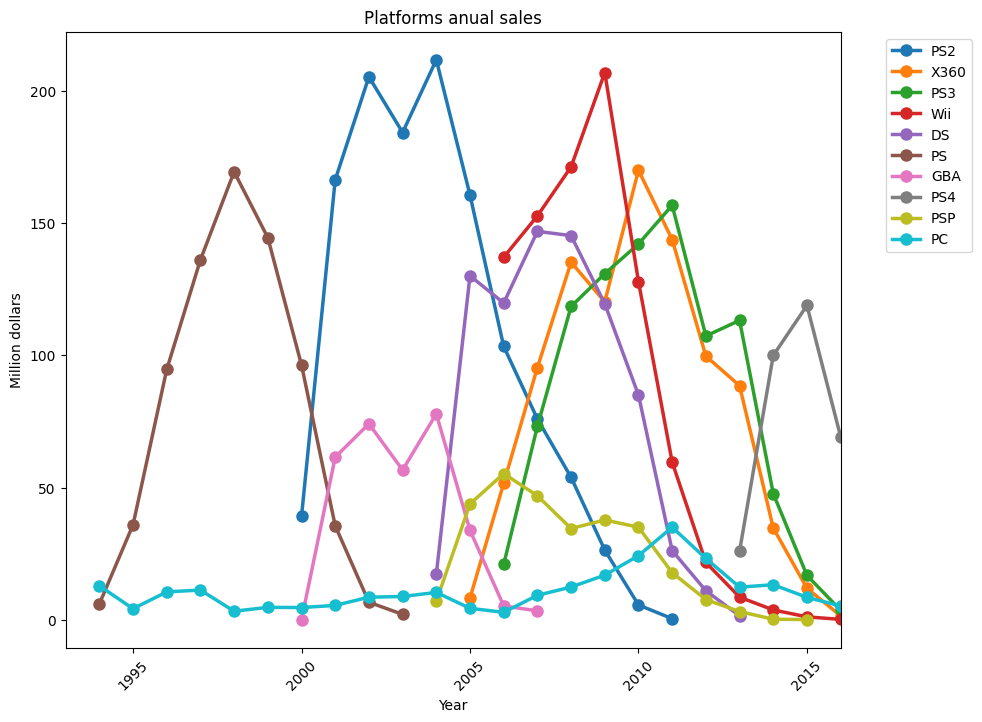

In [38]:
#realizar gráfico para ver evolución en las ventas totales de plataformas con más ganancias entre 1993 y 2016
platforms_anual_sales[top_10_platforms].plot(kind='line',
                                                 figsize=[10,8],
                                                 linewidth=2.5,
                                                 title='Platforms anual sales',
                                                 ylabel='Million dollars',
                                                 xlabel='Year', 
                                                 rot=45,
                                                 markersize=8,
                                                 marker='o',
                                                 xlim=[1993,2016])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [39]:
#identificar plataformas con menos ventas
less_profitable_platforms = (games_df.groupby('platform')['total_sales']
                            .sum()
                            .sort_values(ascending=False)[11:24]
                            .index.tolist())
less_profitable_platforms

['XB',
 'GB',
 'NES',
 'N64',
 'SNES',
 'GC',
 'XOne',
 '2600',
 'WiiU',
 'PSV',
 'SAT',
 'GEN',
 'DC']

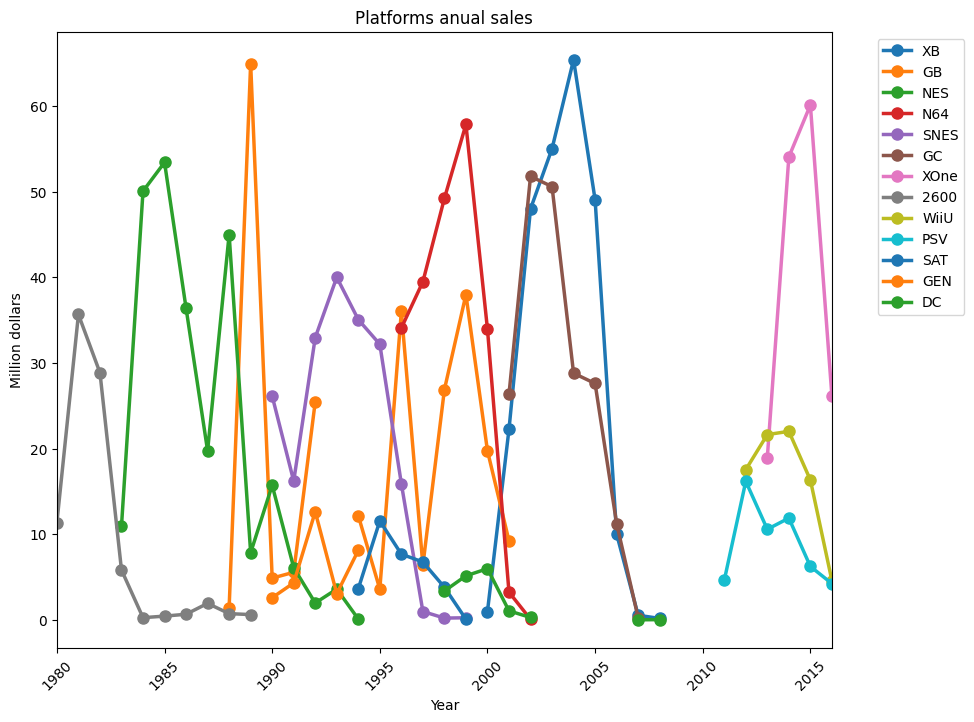

In [40]:
#realizar gráfico para ver evolución en las ventas totales de cada plataforma entre 1980 y 2016
platforms_anual_sales[less_profitable_platforms].plot(kind='line',
                                                 figsize=[10,8],
                                                 linewidth=2.5,
                                                 title='Platforms anual sales',
                                                 ylabel='Million dollars',
                                                 xlabel='Year', 
                                                 rot=45,
                                                 markersize=8,
                                                 marker='o',
                                                 xlim=[1980,2016])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

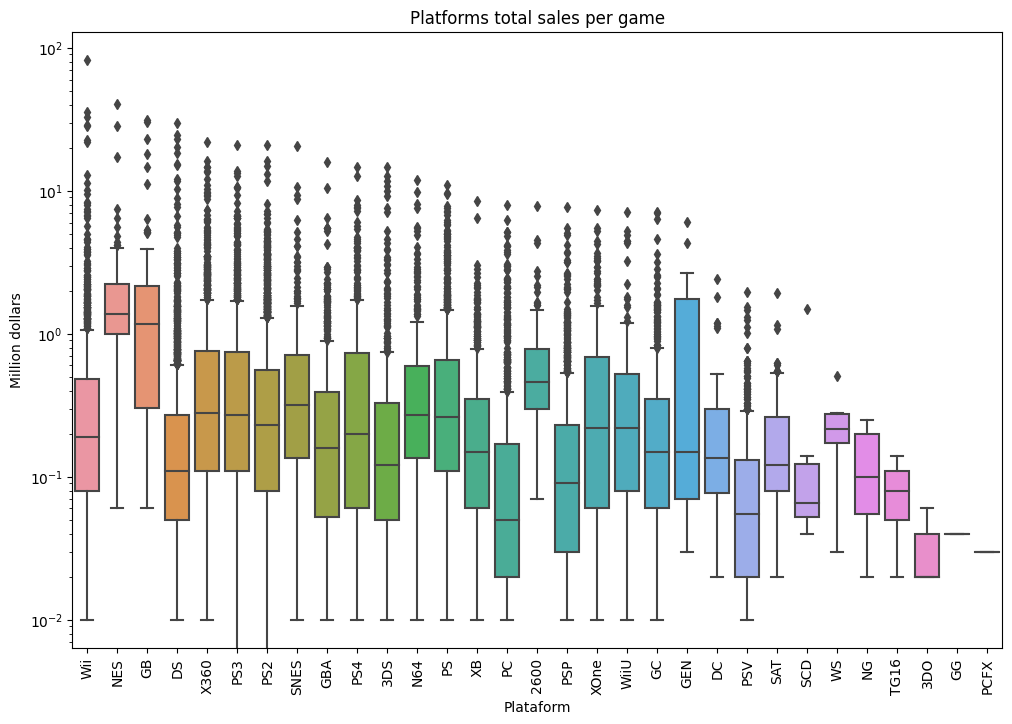

In [41]:
#generar diagrama de cajas para ventas totales de cada plataforma
plt.figure(figsize=(12, 8)) 
sns.boxplot(data=games_df,x='platform', y='total_sales')

plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Platforms total sales per game')
plt.xlabel('Plataform')
plt.ylabel('Million dollars')

plt.show()

### Análisis por puntuaciones 

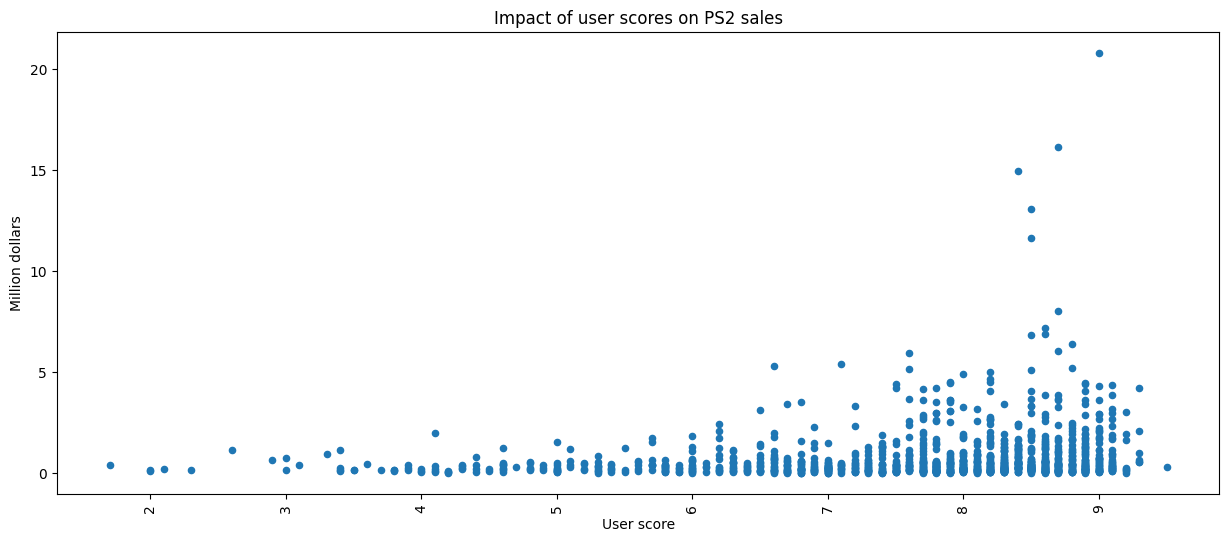

In [42]:
#calcular relación entre user_score y total_sales de PS2 
filtered_data_ps2 = (games_df
                     .query("platform == 'PS2'")
                     .query("year_of_release >= 2000")
                     .dropna(subset=['user_score', 'total_sales']))

filtered_data_ps2.plot(kind='scatter',
                       x='user_score',
                       y='total_sales',
                       xlabel='User score',
                       ylabel='Million dollars',
                       title='Impact of user scores on PS2 sales',
                       figsize=[15,6],
                       rot=90
                       )

plt.show()

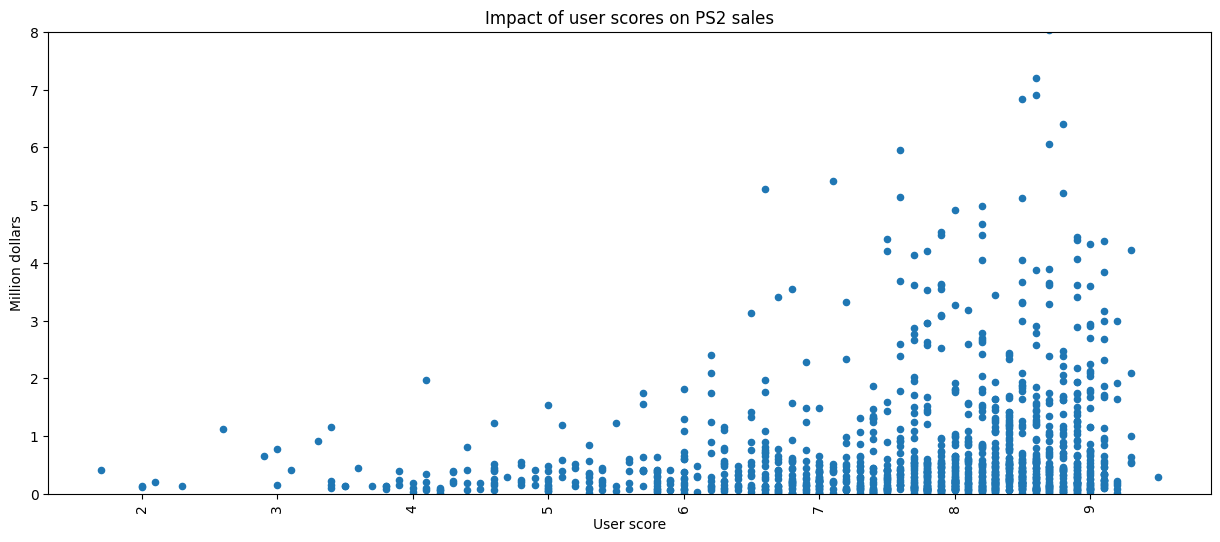

In [43]:
#gráfico anterior con límites en y para mejor visualización 

filtered_data_ps2.plot(kind='scatter',
                       x='user_score',
                       y='total_sales',
                       xlabel='User score',
                       ylabel='Million dollars',
                       title='Impact of user scores on PS2 sales',
                       figsize=[15,6],
                       rot=90,
                       ylim=[0, 8]
                       )

plt.show()

In [44]:
#calcular índice de correlación filtered_data_ps2 - user_score

filtered_data_ps2['user_score'].corr(filtered_data_ps2['total_sales'])

0.1750550277038374

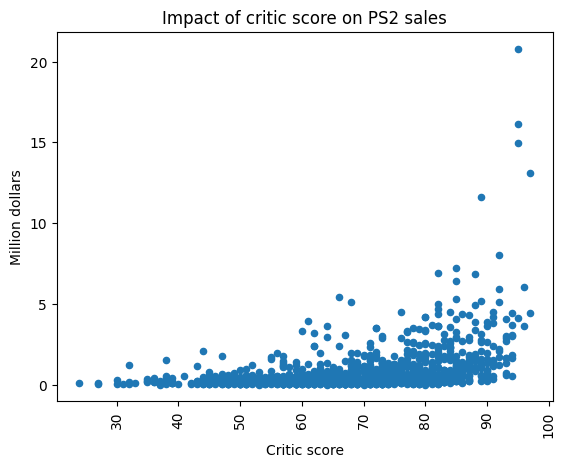

In [45]:
#calcular relación entre critic_score y total_sales de PS2 
filtered_data_ps2_critic = (games_df
                             .query("platform == 'PS2'")
                             .query("year_of_release >= 2000")
                             .dropna(subset=['critic_score', 'total_sales']))

filtered_data_ps2_critic.plot(kind='scatter',
                               x='critic_score',
                               y='total_sales',
                               xlabel='Critic score',
                               ylabel='Million dollars',
                               title='Impact of critic score on PS2 sales',
                               rot=90
                               )

plt.show()

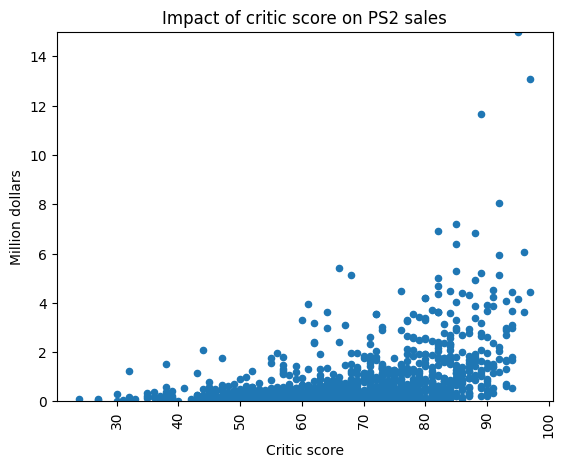

In [46]:
#gráfico anterior con mejor visualización 
filtered_data_ps2_critic.plot(kind='scatter',
                              x='critic_score',
                              y='total_sales',
                              xlabel='Critic score',
                              ylabel='Million dollars',
                              title='Impact of critic score on PS2 sales',
                              rot=90,
                              ylim=[0,15]
                              )

plt.show()

In [47]:
#calcular índice de correlación filtered_data_ps2 - critic_score

filtered_data_ps2['critic_score'].corr(filtered_data_ps2['total_sales'])

0.3864151028406

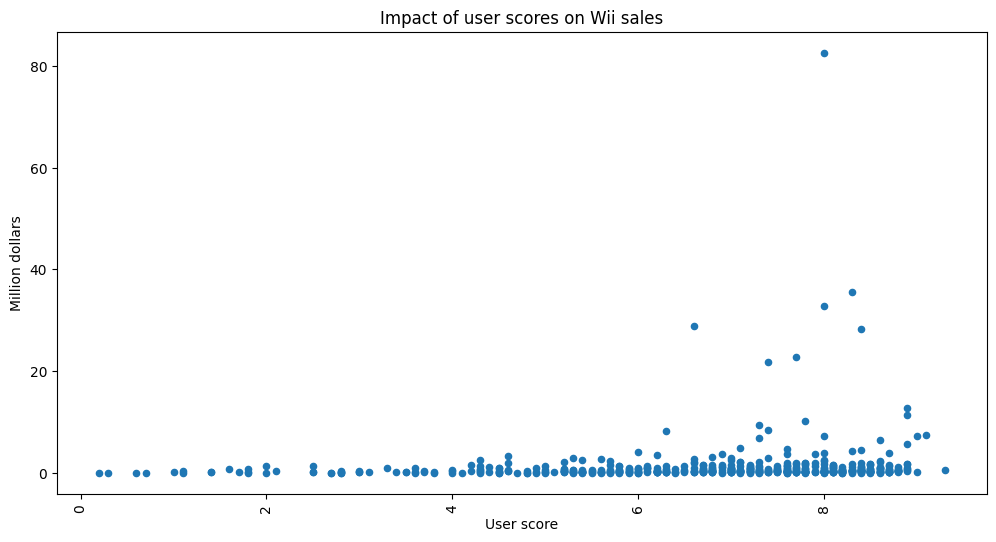

In [48]:
#calcular relación entre user_score y total_sales de Wii 
filtered_data_wii = (games_df
                     .query("platform == 'Wii'")
                     .query("year_of_release >= 2000")
                     .dropna(subset=['user_score', 'total_sales']))

filtered_data_wii.plot(kind='scatter',
                       x='user_score',
                       y='total_sales',
                       xlabel='User score',
                       ylabel='Million dollars',
                       title='Impact of user scores on Wii sales',
                       figsize=[12,6],
                       rot=90
                       )

plt.show()

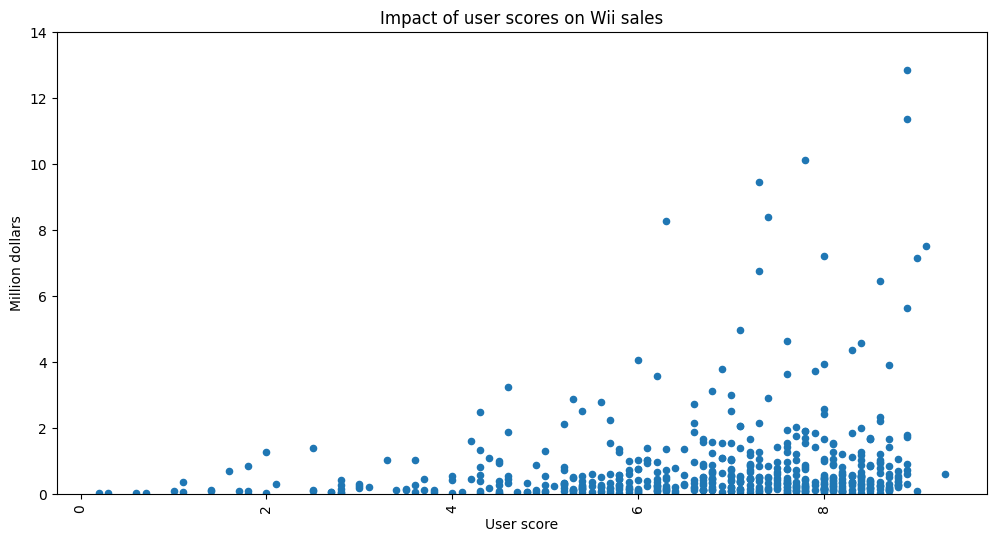

In [49]:
#gráfico anterior con mejor visualización en y 
filtered_data_wii.plot(kind='scatter',
                       x='user_score',
                       y='total_sales',
                       xlabel='User score',
                       ylabel='Million dollars',
                       title='Impact of user scores on Wii sales',
                       figsize=[12,6],
                       rot=90,
                       ylim=[0,14]
                       )

plt.show()

In [50]:
#calcular índice de correlación filtered_data_wii - user_score

filtered_data_wii['user_score'].corr(filtered_data_wii['total_sales'])

0.11283121360773772

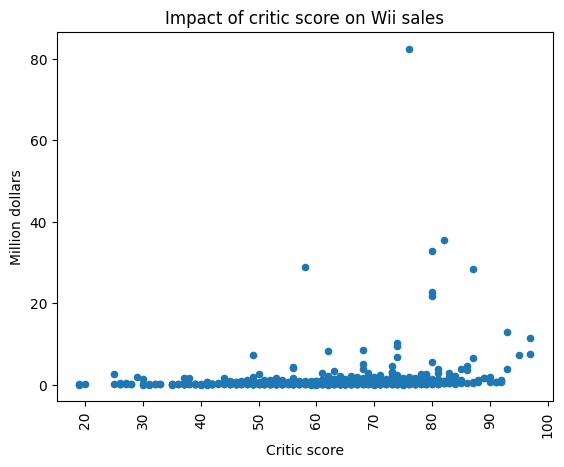

In [51]:
#calcular relación entre critic_score y total_sales de Wii 
filtered_data_wii_critic = (games_df
                             .query("platform == 'Wii'")
                             .query("year_of_release >= 2000")
                             .dropna(subset=['critic_score', 'total_sales']))

filtered_data_wii_critic.plot(kind='scatter',
                               x='critic_score',
                               y='total_sales',
                               xlabel='Critic score',
                               ylabel='Million dollars',
                               title='Impact of critic score on Wii sales',
                               rot=90
                               )

plt.show()

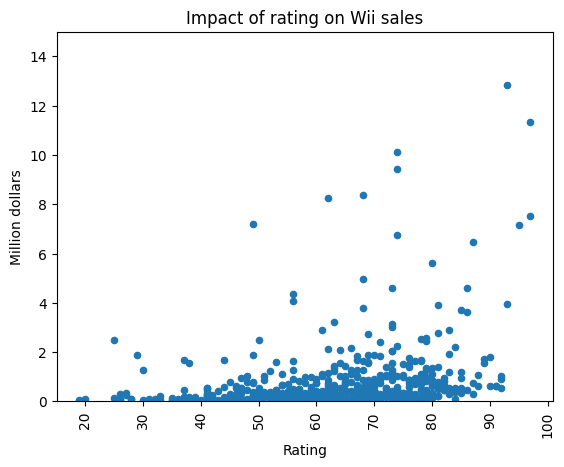

In [52]:
#gráfico anterior con mejor visualización en y 
filtered_data_wii_critic.plot(kind='scatter',
                              x='critic_score',
                              y='total_sales',
                              xlabel='Rating',
                              ylabel='Million dollars',
                              title='Impact of rating on Wii sales',
                              rot=90,
                              ylim=[0, 15]
                              )

plt.show()

In [53]:
#calcular índice de correlación filtered_data_wii -critic_score

filtered_data_wii['critic_score'].corr(filtered_data_wii['total_sales'])

0.17085459105550813

### Análisis por plataforma

In [54]:
#filtrar top 10 juegos con mayor ventas
top_10_games = (games_df.groupby('name')['total_sales']
                    .sum()
                    .sort_values(ascending=False)
                    .head(10)
                    .index.tolist()
                   )
top_10_games

['Wii Sports',
 'Grand Theft Auto V',
 'Super Mario Bros.',
 'Tetris',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Pokemon Red/Pokemon Blue',
 'Call of Duty: Black Ops',
 'Call of Duty: Modern Warfare 3',
 'New Super Mario Bros.']

In [55]:
#platforms_anual_sales[top_10_platforms].plot(kind='line',
                                                 #figsize=[10,8],
                                                 #linewidth=2.5,
                                                 #title='Platforms anual sales',
                                                 #ylabel='Million dollars',
                                                 #xlabel='Year', 
                                                 #rot=45,
                                                 #markersize=8,
                                                 #marker='o',
                                                 #xlim=[1993,2016])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.show()

In [56]:
#tabla comparativa venta de juegos por plataformas 

#filtrar datatframe
#games_per_platform_grouped = (games_df
                              #.query("year_of_release >= 2000")
                              #.groupby(['platform', 'name'])['total_sales']
                              #.sum()
                              #.reset_index()
                             #)

games_per_platform_pvt = (games_df
                          .query("year_of_release >= 2000")
                          .query("name == @top_10_games")
                          .pivot_table(index='platform',
                                       columns='name', 
                                       values='total_sales', 
                                       aggfunc=sum)
                         )

games_per_platform_pvt

name,Call of Duty: Black Ops,Call of Duty: Modern Warfare 3,Grand Theft Auto V,Mario Kart Wii,New Super Mario Bros.,Wii Sports,Wii Sports Resort
platform,,,,,,,
DS,0.58,NaN,NaN,NaN,29.8,NaN,NaN
PC,NaN,1.71,1.17,NaN,NaN,NaN,NaN
PS3,12.63,13.33,21.05,NaN,NaN,NaN,NaN
PS4,NaN,NaN,12.62,NaN,NaN,NaN,NaN
Wii,1.37,0.83,NaN,35.52,NaN,82.54,32.77
X360,14.62,14.73,16.27,NaN,NaN,NaN,NaN
XOne,NaN,NaN,5.47,NaN,NaN,NaN,NaN


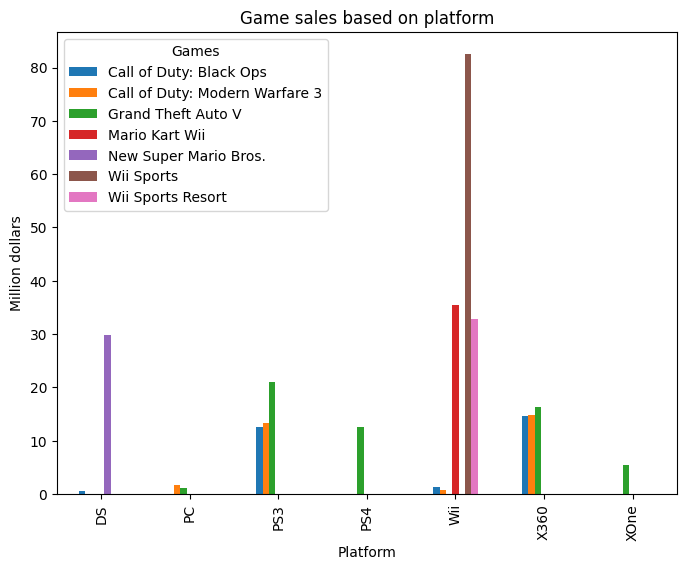

In [57]:
#graficar cambios en las ventas totales de un juego dependiendo de la plataforma
games_per_platform_pvt.plot(kind='bar',
                            title='Game sales based on platform',
                           ylabel='Million dollars',
                           xlabel='Platform',
                           figsize=[8,6]
                           )
plt.legend(title='Games')                       
plt.show()

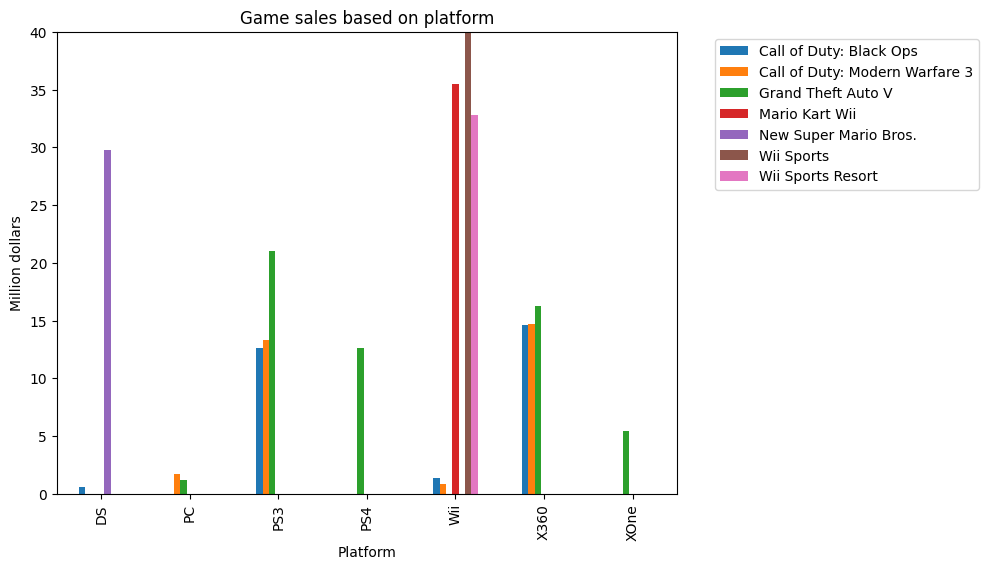

In [58]:
#gráfico anterior con mejor visualización de ventas hasta 40 millones de dólares
games_per_platform_pvt.plot(kind='bar',
                            title='Game sales based on platform',
                            ylabel='Million dollars',
                            xlabel='Platform',
                            figsize=[8,6],
                            ylim=[0,40]
                            )
plt.legend(title='Games') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Análisis por género

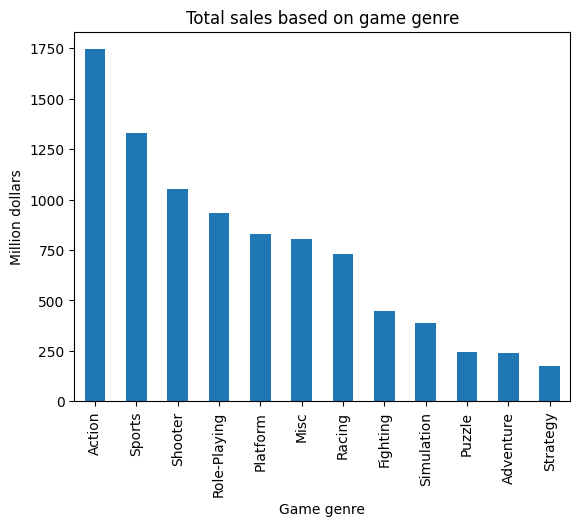

In [59]:
#visualizar ventas totales de juegos dependiendo del género
genre_games_grouped = (games_df
                       .groupby('genre')['total_sales']
                       .sum()
                       .sort_values(ascending=False)
                       .reset_index()
                      )

genre_games_grouped.plot(kind='bar',
                        x='genre',
                        y='total_sales',
                        legend=False,
                        ylabel='Million dollars',
                        xlabel='Game genre',
                        title='Total sales based on game genre')

plt.show()

### Conclusiones

Al analizar los datos se puede observar un fuerte crecimiento en la tasa de lanzamiento entre los años 2002 y 2011, alcanzando su peak entre los años 2008 y 2009 con más de 1400 juegos liberados al público en las distintas plataformas. Si se revisan los lanzamientos por plataforma a lo largo de los años (1980-2016), quienes han destacado por la cantidad de juegos lanzamos son DS y PS2, con más de 2000 en 36 años. Las plataformas que siguen estos números son PS3 y Wii, pero estos no superan los 1400 juegos.

Al graficar las ventas de las distintas plataformas podemos dar cuenta que aquellas con más ganancias se mantienen activas por alrededor de 10 años y las plataformas con menos ventas, por 5 años. Además, es importante mencionar que la gran mayoría de las plataformas tienen un comportamiento de parábola con respecto a sus ventas, es decir, al inicio sus ventas van en aumento y con el paso de los años sus ganancias son menores. Cabe destacar que las plataformas con mejores ganancias son PS2 y X360 y aquellas plataformas que siguen activas al 2016 son PS3, PS4, Wii, PC y X360.  A raíz de esta visualización se trabaja con los datos desde los años 2000 en adelante porque en esta fecha surgen las plataformas con las mejores ventas y que se mantienen por un largo periodo de tiempo entre 2000 y 2016.

Al volver a revisar las ventas en un diagrama de caja, podemos dar cuenta que los montos de las ganancias por juego son más o menos parejas entre varias plataformas. Sin embargo, hay una gran cantidad de outliers por ventas en plataformas significativamente más altas.

Se analiza si es que hay una relación entre las puntuaciones de los usuarios y los profesionales con respecto a las ventas, los resultados visuales y matemáticos dan cuenta que la correlación es levemente positiva entre ellos. La puntuación que más influye es la de los usuarios, esto tiene sentido ya que son ellos quienes utilizan los juegos. 

También se comparan los juegos con relación a sus ganancias en las distintas plataformas. Sin embargo, hay solo 3 juegos que se lanzan en distintas plataformas y cuyas ventas son muy variadas entre sí. 

Finalmente, se analiza el éxito en ventas de los juegos con relación al género lo que revela que las categorías con mayores ganancias son las de acción y deportes. Las categorías con menos éxito son las de aventuras y estrategia. 


<div class="alert alert-block alert-success">
<b>Comentarios del revisor:</b>

Has realizado un análisis exhaustivo y bien estructurado de los datos. Tu enfoque metódico, que abarca múltiples aspectos como el análisis por años, puntuaciones, plataformas y géneros, proporciona una visión integral del mercado de videojuegos.

Puntos fuertes:
1. Visualizaciones efectivas: Tus gráficos son claros y informativos, especialmente el gráfico de barras de lanzamientos anuales y el gráfico de líneas de ventas por plataforma.
2. Análisis temporal: Has identificado tendencias importantes, como el pico de lanzamientos entre 2008-2009 y el ciclo de vida típico de las plataformas.
3. Análisis de plataformas: La identificación de las plataformas más exitosas (PS2, X360) y la comparación de sus ciclos de vida es valiosa.
4. Correlaciones: Has explorado las relaciones entre puntuaciones (de usuarios y críticos) y ventas, encontrando correlaciones positivas leves.
5. Análisis por género: La identificación de los géneros más exitosos (acción y deportes) proporciona información útil para decisiones de negocio.

Áreas de mejora:
1. Podrías profundizar en el análisis de outliers en las ventas por plataforma.
2. Considera realizar pruebas estadísticas para validar las diferencias observadas entre plataformas o géneros.
3. Podrías explorar más a fondo la relación entre el año de lanzamiento y el éxito de ventas.

Tu conclusión resume bien los hallazgos clave y proporciona insights valiosos para la toma de decisiones en la industria de los videojuegos. La decisión de enfocarse en los datos desde 2000 en adelante está bien justificada por tus observaciones.

En general, este análisis proporciona una base sólida para entender las dinámicas del mercado de videojuegos y podría ser muy útil para informar estrategias de desarrollo y marketing.
</div>

## Perfiles de usuario por región 

### Principales plataformas 

In [60]:
#calcular 5 plataformas más exitosas en Norteamérica
top_5_platforms_na = (games_df
                      .query("year_of_release >= 2000")
                      .groupby('platform')['na_sales']
                      .sum()
                      .sort_values(ascending=False)
                      .head(5)
                      .index.tolist()
                     )
top_5_platforms_na

['X360', 'PS2', 'Wii', 'PS3', 'DS']

In [61]:
#calcular 5 plataformas más exitosas en Japón
top_5_platforms_jp = (games_df
                      .query("year_of_release >= 2000")
                      .groupby('platform')['jp_sales']
                      .sum()
                      .sort_values(ascending=False)
                      .head(5)
                      .index.tolist()
                     )
top_5_platforms_jp

['DS', 'PS2', '3DS', 'PS3', 'PSP']

In [62]:
#calcular 5 plataformas más exitosas en Europa
top_5_platforms_eu = (games_df
                      .query("year_of_release >= 2000")
                      .groupby('platform')['eu_sales']
                      .sum()
                      .sort_values(ascending=False)
                      .head(5)
                      .index.tolist()
                     )
top_5_platforms_eu

['PS2', 'PS3', 'X360', 'Wii', 'DS']

In [63]:
#calcular ventas top5 en cada región

#na
top_5_na = (games_df
            .query("platform == @top_5_platforms_na")
            .groupby('platform')['na_sales']
            .sum()
            .sort_values(ascending=False)
           )

#jp
top_5_jp = (games_df
            .query("platform == @top_5_platforms_jp")
            .groupby('platform')['jp_sales']
            .sum()
            .sort_values(ascending=False)
           )

#eu
top_5_eu = (games_df
            .query("platform == @top_5_platforms_eu")
            .groupby('platform')['eu_sales']
            .sum()
            .sort_values(ascending=False)
           )

In [64]:
#calcular total del top5 de cada región 

dict_top_5_na = dict(top_5_na)
total_top5_na = sum(dict_top_5_na.values())

dict_top_5_jp = dict(top_5_jp)
total_top5_jp = sum(dict_top_5_jp.values())

dict_top_5_eu = dict(top_5_eu)
total_top5_eu= sum(dict_top_5_eu.values())

In [65]:
print("ventas totales top 5 na:")
print(top_5_na)
print("total:", total_top5_na)
print()
print("ventas totales top 5 jp:")
print(top_5_jp)
print("total:", total_top5_jp)
print()
print("ventas totales top 5 eu:")
print(top_5_eu)
print("total:", total_top5_eu)

ventas totales top 5 na:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
total: 2459.0999999999885

ventas totales top 5 jp:
platform
DS     175.57
PS2    139.20
3DS    100.67
PS3     80.19
PSP     76.78
Name: jp_sales, dtype: float64
total: 572.4100000000013

ventas totales top 5 eu:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
DS      188.89
Name: eu_sales, dtype: float64
total: 1391.4399999999878


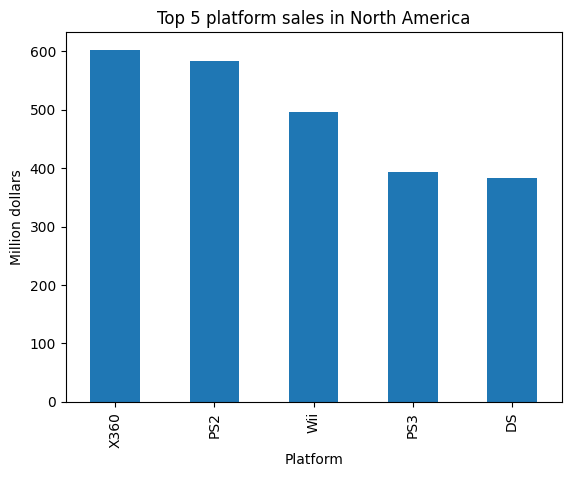

In [66]:
# graficar top 5 na
top_5_na.plot(kind='bar',
             title='Top 5 platform sales in North America',
             ylabel='Million dollars',
             xlabel='Platform')

plt.show()

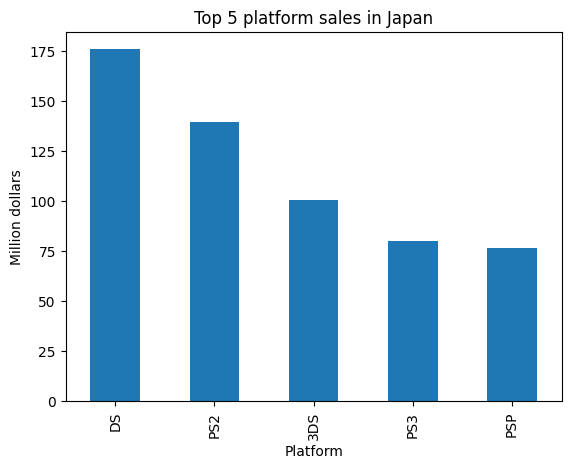

In [67]:
# graficar top 5 jp
top_5_jp.plot(kind='bar',
             title='Top 5 platform sales in Japan',
             ylabel='Million dollars',
             xlabel='Platform')

plt.show()

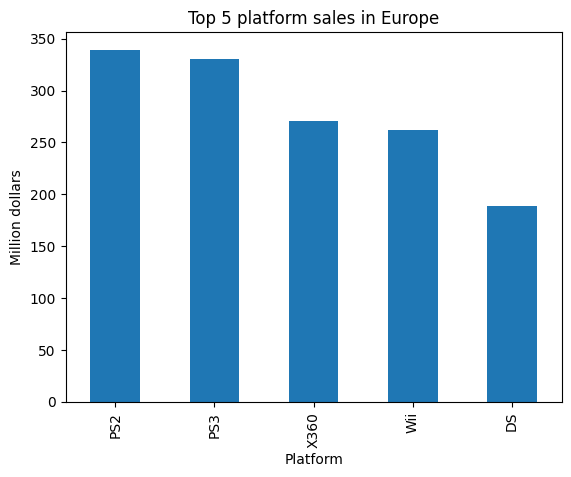

In [68]:
# graficar top 5 eu
top_5_eu.plot(kind='bar',
             title='Top 5 platform sales in Europe',
             ylabel='Million dollars',
             xlabel='Platform')

plt.show()

### Géneros principales


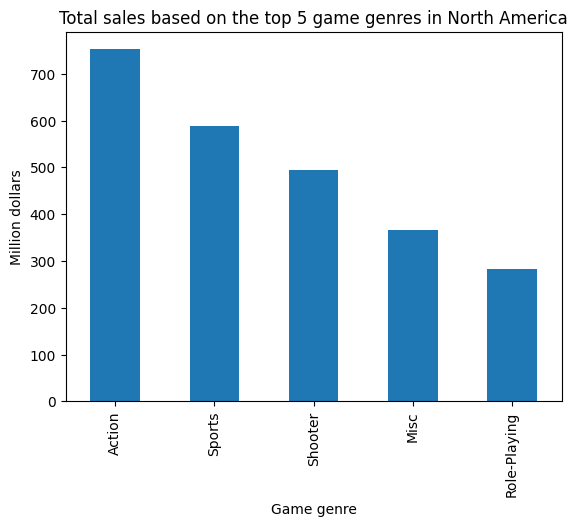

In [69]:
#visualizar ventas totales de na
genre_games_grouped_na = (games_df
                          .query("year_of_release >= 2000")
                          .groupby('genre')['na_sales']
                          .sum()
                          .sort_values(ascending=False)
                          .head(5)
                          .reset_index()
                           )

genre_games_grouped_na.plot(kind='bar',
                            x='genre',
                            y='na_sales',
                            legend=False,
                            ylabel='Million dollars',
                            xlabel='Game genre',
                            title='Total sales based on the top 5 game genres in North America')

plt.show()

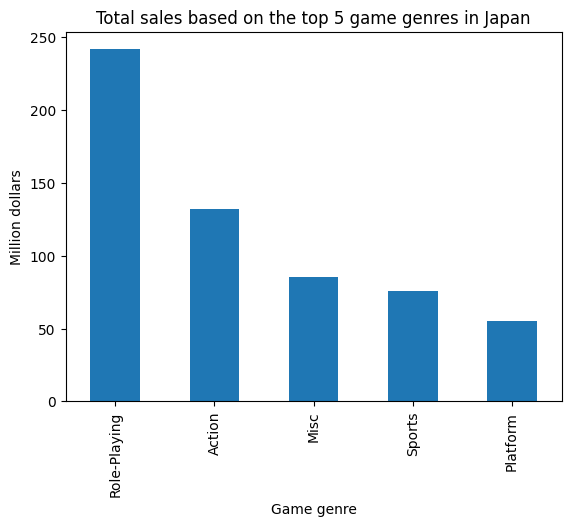

In [70]:
#visualizar ventas totales de jp
genre_games_grouped_jp = (games_df
                          .query("year_of_release >= 2000")
                          .groupby('genre')['jp_sales']
                          .sum()
                          .sort_values(ascending=False)
                          .head(5)
                          .reset_index()
                           )

genre_games_grouped_jp.plot(kind='bar',
                            x='genre',
                            y='jp_sales',
                            legend=False,
                            ylabel='Million dollars',
                            xlabel='Game genre',
                            title='Total sales based on the top 5 game genres in Japan')

plt.show()

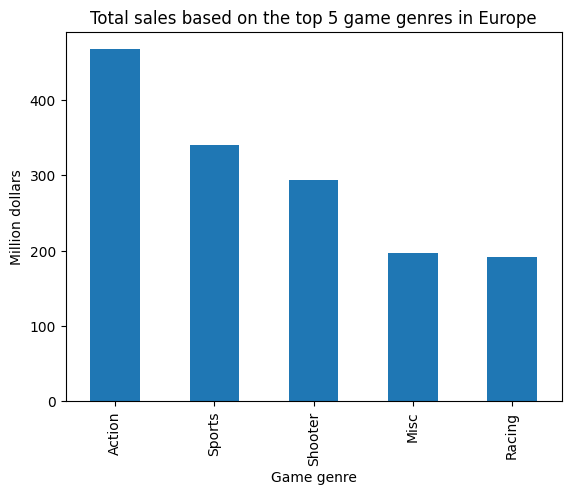

In [71]:
#visualizar ventas totales de eu
genre_games_grouped_eu = (games_df
                          .query("year_of_release >= 2000")
                          .groupby('genre')['eu_sales']
                          .sum()
                          .sort_values(ascending=False)
                          .head(5)
                          .reset_index()
                           )

genre_games_grouped_eu.plot(kind='bar',
                            x='genre',
                            y='eu_sales',
                            legend=False,
                            ylabel='Million dollars',
                            xlabel='Game genre',
                            title='Total sales based on the top 5 game genres in Europe')

plt.show()

### Puntuación ESRB

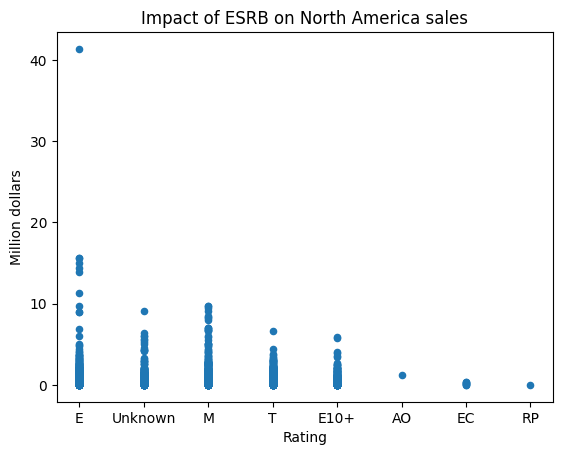

In [72]:
#gráfico na
games_df.query("year_of_release >= 2000").plot(kind='scatter',
                                              x='rating',
                                              y='na_sales',
                                              title='Impact of ESRB on North America sales',
                                              ylabel='Million dollars',
                                              xlabel='Rating'
                                              )

plt.show()

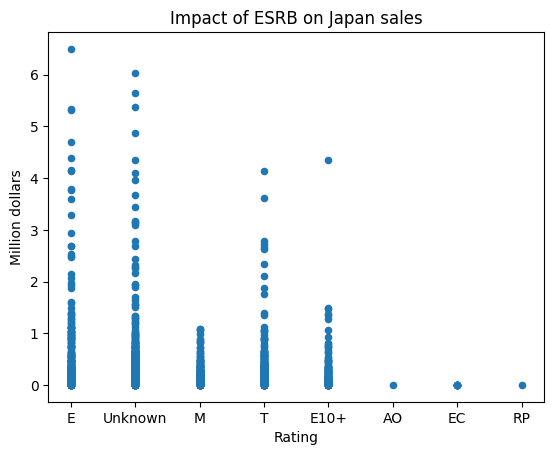

In [73]:
#gráfico jp
games_df.query("year_of_release >= 2000").plot(kind='scatter',
                                              x='rating',
                                              y='jp_sales',
                                              title='Impact of ESRB on Japan sales',
                                              ylabel='Million dollars',
                                              xlabel='Rating'
                                              )

plt.show()

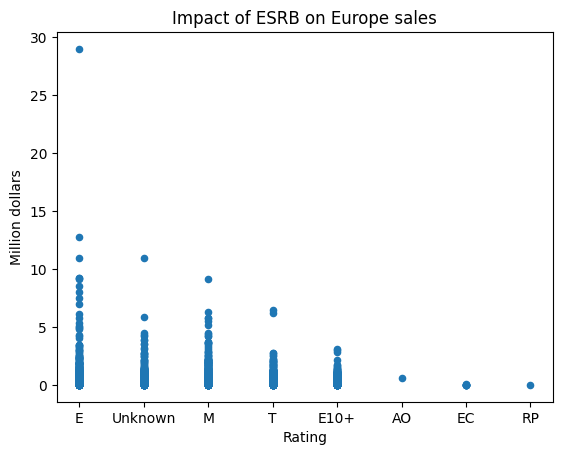

In [74]:
#gráfico eu
games_df.query("year_of_release >= 2000").plot(kind='scatter',
                                              x='rating',
                                              y='eu_sales',
                                              title='Impact of ESRB on Europe sales',
                                              ylabel='Million dollars',
                                              xlabel='Rating'
                                              )

plt.show()

<div class="alert alert-block alert-success">
<b>Comentarios del revisor:</b>

Esta visualización de dispersión muestra información interesante sobre el impacto de las clasificaciones ESRB en las ventas en Europa, pero podría ser más efectiva si se presentara como un gráfico de barras. Un gráfico de barras permitiría una comparación más clara y directa de las ventas promedio o totales por cada categoría ESRB, facilitando la identificación de tendencias generales y diferencias entre las clasificaciones. Además, un gráfico de barras reduciría la superposición de puntos que se observa actualmente, especialmente en las categorías con más datos como 'E' y 'M', lo que mejoraría la legibilidad y la interpretación de los datos."
</div>

### Conclusiones

Al revisar el comportamiento por regiones podemos dar cuenta que dentro de las plataformas más populares PS2 es parte del top 5 en Norte américa (NA), Japón (JP) y Europa (EU) y X360 es parte de este ranking en NA y EU. Sin embargo, las ventas totales del top 5 de cada país difiere significativamente, siendo NA la región que genera las mayores ganancias: casi el doble que EU y cinco veces lo vendido por Japón.

Con respecto a los géneros mejor vendidos, action, sports y misc son parte del top 5 en las tres regiones. Action y sports son los más populares en NA y EU, mientras que el género más popular en JP es role-playing seguido de action y sports. 

Finalmente podemos dar cuenta que el impacto de las puntuaciones de expertos en los juegos es directamente proporcional. Es decir, a mejor puntuación, mayor venta por juego.


## Pruebas de hipótesis

### Comparar igualdad user_score XOne y PC

Probar hipótesis de que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas:

a) Hipótesis nula: las calificaciones promedio de user_score para Xbox One y PC son iguales.

b) Hipótesis alternativa: las calificaciones promedio de user_score para Xbox One y PC son diferentes. 

#### Revisar datos de ambas variables 

In [75]:
#revisar datos de XOne
games_df.query("platform == 'XOne'")['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

<AxesSubplot:xlabel='user_score'>

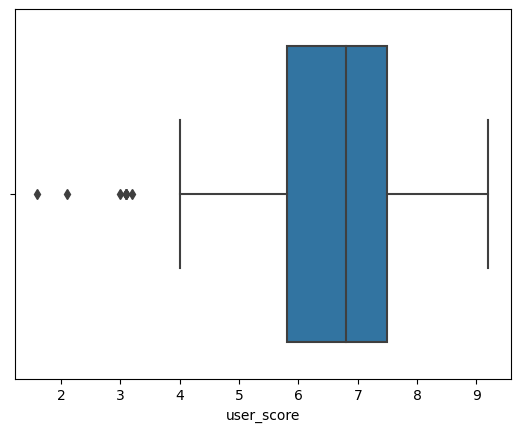

In [76]:
#revisar outliers XOne
sns.boxplot(games_df.query("platform == 'XOne'")['user_score'])

In [77]:
#revisar datos PC
games_df.query("platform == 'PC'")['user_score'].describe()

count    770.000000
mean       7.062468
std        1.529963
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score, dtype: float64

<AxesSubplot:xlabel='user_score'>

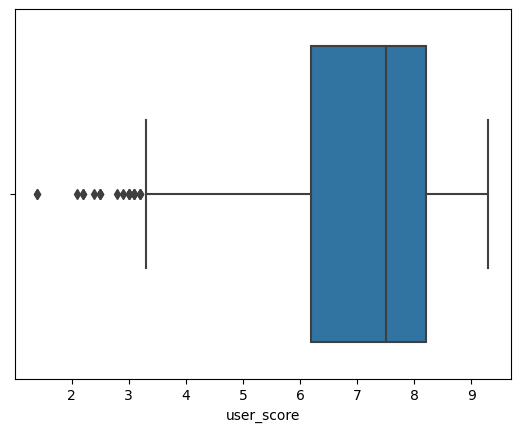

In [78]:
#revisar outliers PC
sns.boxplot(games_df.query("platform == 'PC'")['user_score'])

#### Cálculo user_score para Xbox One y PC sin outliers

In [79]:
#calcular outliers de XOne

xbox_q1 = games_df.query("platform == 'XOne'")['user_score'].quantile(0.25)
xbox_q3 = games_df.query("platform == 'XOne'")['user_score'].quantile(0.75)
xbox_iqr = xbox_q3 - xbox_q1

uscore_xbox_outliers = xbox_q3 + 1.5*xbox_iqr
uscore_xbox_outliers

10.05

In [80]:
#calcular outliers de PC

pc_q1 = games_df.query("platform == 'PC'")['user_score'].quantile(0.25)
pc_q3 = games_df.query("platform == 'PC'")['user_score'].quantile(0.75)
pc_iqr = pc_q3 - pc_q1

uscore_pc_outliers = pc_q3 + 1.5*pc_iqr
uscore_pc_outliers

11.199999999999998

In [81]:
#calculo variables sin outliers

#xbox
uscore_xbox_no_outliers = (games_df
                           .query("user_score < @uscore_xbox_outliers")
                           .query("platform == 'XOne'")['user_score']
                           )

#pc
uscore_pc_no_outliers = (games_df
                         .query("user_score < @uscore_pc_outliers")
                         .query("platform == 'PC'")['user_score']
                         )

#### Comprobar varianzas 

In [82]:
#probar si las varianzas de XOne y PC son iguales o no

alpha= 0.05

results = st.levene(uscore_xbox_no_outliers, uscore_pc_no_outliers)

print('p_value:', results.pvalue)

if results.pvalue < alpha: 
    print('Podemos descartar la hipótesis nula. Varianzas diferentes')
else:
    print('No podemos descartar la hipótesis nula')

p_value: 0.2693951512047048
No podemos descartar la hipótesis nula


#### Testeo hipótesis 

In [83]:
alpha= 0.05

results = st.ttest_ind(uscore_xbox_no_outliers, uscore_pc_no_outliers)

print('p_value:', results.pvalue)

if results.pvalue < alpha: 
    print('Podemos descartar la hipótesis nula')
else:
    print('No podemos descartar la hipótesis nula')

p_value: 1.3896435533548819e-05
Podemos descartar la hipótesis nula


### Comprobar diferencia user_score XOne y PC

Probar hipótesis de que la calificación promedio de los usuarios para Xbox One es mayor que a calificación de PC:

a) Hipótesis nula: la calificación promedio de los usuarios para Xbox One es menor o igual que la calificación de PC.

b) Hipótesis alternativa: la calificación promedio de los usuarios para Xbox One es mayor que la calificación de PC.

In [84]:
alpha= 0.05

results = st.ttest_ind(uscore_xbox_no_outliers, uscore_pc_no_outliers, alternative='greater')

print('p_value:', results.pvalue)

if results.pvalue < alpha: 
    print('Podemos descartar la hipótesis nula. La calificación promedio de los usuarios para Xbox One es mayor que la calificación de P')
else:
    print('No podemos descartar la hipótesis nula')


p_value: 0.9999930517822332
No podemos descartar la hipótesis nula


### Comparar igualdad user_score para géneros de acción y deportes 

Probar hipótesis de que las calificaciones promedio de los usuarios para los juegos de acción y deportes son las mismas:

a) Hipótesis nula: las calificaciones promedio de user_score para acción y deporte son iguales.

b) Hipótesis alternativa: las calificaciones promedio de user_score para acción y deporte son diferentes.  

#### Revisar datos de ambas variables

In [85]:
#revisar información para juegos de acción 
games_df.query("genre == 'Action'")['user_score'].describe()

count    1830.000000
mean        7.054044
std         1.425394
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

<AxesSubplot:xlabel='user_score'>

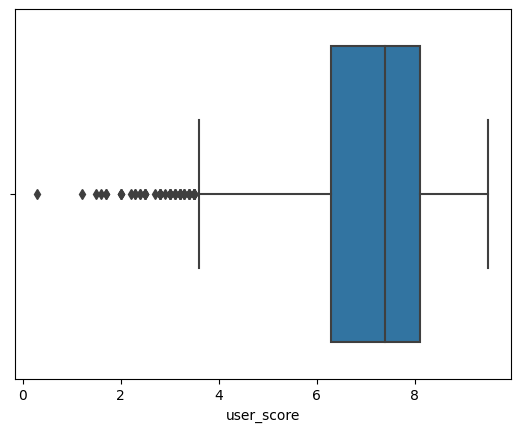

In [86]:
#revisar ouliers juegos de acción
sns.boxplot(games_df.query("genre == 'Action'")['user_score'])

In [87]:
#revisar información para juegos de deporte 
games_df.query("genre == 'Sports'")['user_score'].describe()

count    1103.000000
mean        6.961197
std         1.611370
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

<AxesSubplot:xlabel='user_score'>

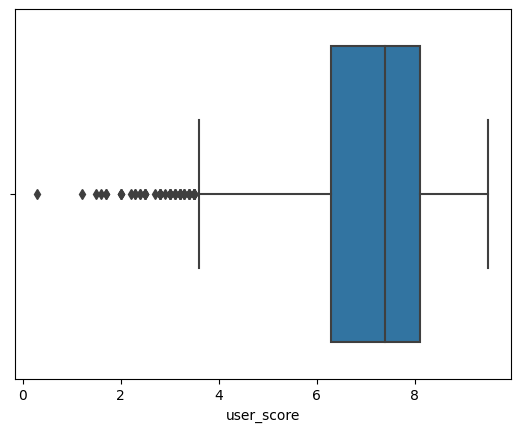

In [88]:
#revisar ouliers juegos de deportes
sns.boxplot(games_df.query("genre == 'Action'")['user_score'])

#### Cálculo user_score para juegos de acción y deporte sin outliers

In [89]:
#calcular outliers de juegos de acción

action_q1 = games_df.query("genre == 'Action'")['user_score'].quantile(0.25)
action_q3 = games_df.query("genre == 'Action'")['user_score'].quantile(0.75)
action_iqr = action_q3 - action_q1

uscore_action_outliers = action_q3 + 1.5*action_iqr
uscore_action_outliers

10.799999999999999

In [90]:
#calcular outliers de juegos de deportes

sports_q1 = games_df.query("genre == 'Sports'")['user_score'].quantile(0.25)
sports_q3 = games_df.query("genre == 'Sports'")['user_score'].quantile(0.75)
sports_iqr = sports_q3 - sports_q1

uscore_sports_outliers = sports_q3 + 1.5*sports_iqr
uscore_sports_outliers

11.1

In [91]:
#calculo variables sin outliers

#xbox
uscore_action_no_outliers = (games_df
                             .query("user_score < @uscore_action_outliers")
                             .query("genre == 'Action'")['user_score']
                             )

#pc
uscore_sports_no_outliers = (games_df
                             .query("user_score < @uscore_sports_outliers")
                             .query("genre == 'Sports'")['user_score']
                             )

#### Comprobar varianzas

In [92]:
#probar si las varianzas de action y sports son iguales o no

alpha= 0.05

results = st.levene(uscore_action_no_outliers, uscore_sports_no_outliers)

print('p_value:', results.pvalue)

if results.pvalue < alpha: 
    print('Podemos descartar la hipótesis nula. Varianzas diferentes')
else:
    print('No podemos descartar la hipótesis nula')

p_value: 0.0001736640672727649
Podemos descartar la hipótesis nula. Varianzas diferentes


#### Testeo hipótesis

In [93]:
#probar hipótesis nula 
alpha= 0.05

results = st.ttest_ind(uscore_action_no_outliers, uscore_sports_no_outliers, equal_var=False)

print('p_value:', results.pvalue)

if results.pvalue < alpha: 
    print('Podemos descartar la hipótesis nula')
else:
    print('No podemos descartar la hipótesis nula')

p_value: 0.11483818791498286
No podemos descartar la hipótesis nula


### Conclusiones 

Para iniciar con el trabajo de testeo de hipótesis estadísticas se revisaron los datos estadísticos de todas las variables a trabajar con describe()  y outliers con diagrama de caja. Debido a que la cantidad de valores atípicos no era muy grande en comparación al total de los datos en cada uno de los casos, se decidió por eliminar estos datos para no sesgar los resultados de las pruebas de hipótesis. Además, se comprobó antes de cada prueba si las varianzas era o no iguales.

En primer lugar se testeó si los promedio de user_score en las plataformas de XOne y PC eran igual, lo que arrojó el descarté de la hipótesis nula propuesta, por lo que se diseñó una nueva prueba que revisaba si el promedio del puntaje por usuarios en la XOne era mayor, prueba que demostró que este promedio era menor o al del promedio en  PC.

También se comprobó si es que el user_score de los juegos de acción y deportes eran iguales, prueba que resultó en la acogida de la hipótesis nula.


## Conclusión general

El análisis se realizó sobre el DataFrame denominado games_df, que contiene 11 columnas y 16,715 filas. El trabajo comenzó con la importación de las librerías pandas, numpy, pyplot, seaborn y stats. Luego, se revisó la información del DataFrame mediante el método info(), verificando la presencia de duplicados y datos ausentes. Dado el porcentaje de valores ausentes en las columnas critic_score y user_score, se decidió mantener los NaN, ya que sustituirlos por la media o la mediana podría alterar los resultados. En cuanto a la columna rating, las categorías 'tbd' se convirtieron a NaN, mientras que los valores ausentes en la columna year se asignaron a 0.

El análisis exploratorio permitió identificar las plataformas y juegos más populares, así como las tendencias de actividad de las plataformas, que suelen mantenerse activas durante aproximadamente 10 años, siguiendo una curva en forma de parábola entre ventas totales y años. A partir de estos hallazgos, se decidió trabajar con los datos desde el año 2000, ya que desde esa fecha es posible obtener un mejor análisis de las plataformas más exitosas.

Se generaron diversas visualizaciones, entre ellas un diagrama de cajas que evidenció una gran cantidad de valores atípicos en las ventas totales por plataforma. Estos outliers corresponden a los "hits" o éxitos de juegos específicos a lo largo de los años (1980-2016). Además, se analizó el impacto de las puntuaciones de usuarios y críticos en las ventas de PS2 y Wii, encontrándose correlaciones positivas, especialmente en la influencia de la crítica profesional en las ventas de PS2. También se evaluó cómo las plataformas afectaban las ventas de los mismos juegos, así como la relación entre el género del juego y sus ganancias.

El análisis por región mostró que el público de Norteamérica (NA) genera una mayor cantidad de ventas en comparación con Japón (JP) y Europa (EU). Este comportamiento puede explicarse, en parte, por la mayor población en Norteamérica. Además, se observó que las tendencias de plataformas y géneros preferidos son similares entre NA y EU.

Finalmente, se llevaron a cabo pruebas de hipótesis sobre los promedios de user_score para las plataformas XOne y PC, y también entre los géneros de juegos de acción y deportes. Los resultados fueron los siguientes:

1. El promedio de user_score es mayor en PC.
2. El promedio de user_score es igual para los juegos de acción y deportes.

Recomendaciones:

Con base en los resultados del análisis del DataFrame, se recomienda potenciar el lanzamiento y la publicidad de juegos en las plataformas PS2, X360, PS3 y Wii, ya que estas plataformas presentan las mejores ventas y forman parte del Top 5 en las tres regiones estudiadas. Además, se sugiere centrarse en juegos de acción y deportes, ya que son los más populares en EU y NA, y también se encuentran en el Top 3 en JP, por lo que una campaña en estos géneros sería efectiva en las tres regiones. No obstante, se debe considerar una mejor acogida a los juegos de rol (role-playing) en Japón.

<div class="alert alert-block alert-success">
<b>Comentarios del revisor</b>

Excelente trabajo en la realización e interpretación de pruebas de hipótesis. Has seguido un enfoque metodológico sólido:

1. Formulación clara de hipótesis nula y alternativa.
2. Revisión cuidadosa de los datos, incluyendo la identificación y manejo de outliers.
3. Comprobación de igualdad de varianzas antes de las pruebas t.
4. Interpretación correcta de los resultados basada en los p-valores.

Tus conclusiones son coherentes con los resultados obtenidos y proporcionan insights valiosos sobre las diferencias en las calificaciones de usuarios entre plataformas y géneros.

La conclusión general es completa y bien estructurada. Resumes eficazmente los principales hallazgos del análisis, desde la preparación de datos hasta las pruebas de hipótesis. Las recomendaciones finales son prácticas y están bien fundamentadas en los resultados del análisis.


</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Impresionante esfuerzo en este proyecto! 🌟 **Este proyecto está listo para ser aprobado.**<br>
Tu habilidad para ejecutar y presentar este trabajo es admirable.<br>
<br>Es un placer reconocer tu dedicación y el análisis detallado que has llevado a cabo. Continúa superándote en tus futuras iniciativas. Confío en que aplicarás este conocimiento de manera efectiva en desafíos futuros, avanzando hacia objetivos aún más ambiciosos.
</div>
